# UvA notebook

## Import Data

In [1]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')
%matplotlib inline

df = pd.read_csv('../outputs/fb/your_data/likes.csv')
df = df.set_index(pd.DatetimeIndex(df['timestamp']))
df1 = df.groupby(['actor', 'reaction', 'source', df.index.date]).count()
df1.index.names = ['actor', 'reaction', 'source', 'date']
df1.columns = ['count']
df1 = df1.reset_index()
df1.date = pd.to_datetime(df1.date)

## Count of reactions per user by source

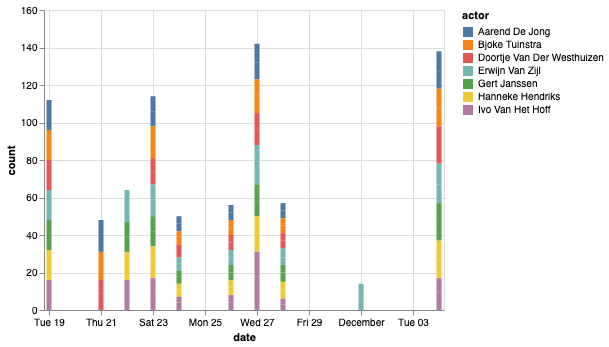

In [2]:
input_dropdown = alt.binding_select(options=list(set(df1.source.unique())))
selection = alt.selection_single(
    fields=['source'], bind=input_dropdown, name='Select an')
color = alt.condition(selection,
                      alt.Color('actor:N', legend=None),
                      alt.value('lightgray'))

alt.Chart(df1).mark_bar().encode(
    x='date:T',
    y='count:Q',
    color='actor:N',
    tooltip='count:N'
).add_selection(
    selection
).transform_filter(
    selection
)

## Count of reactions per source by user

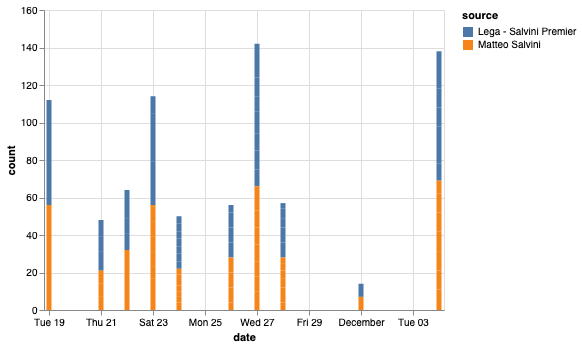

In [3]:
input_dropdown = alt.binding_select(options=list(set(df1.actor.unique())))
selection = alt.selection_single(
    fields=['actor'], bind=input_dropdown, name='Select an')
color = alt.condition(selection,
                      alt.Color('source:N', legend=None),
                      alt.value('lightgray'))

alt.Chart(df1).mark_bar().encode(
    x='date:T',
    y='count:Q',
    color='source:N',
    tooltip='count:N'
).add_selection(
    selection
).transform_filter(
    selection
)

## Plot all reactions

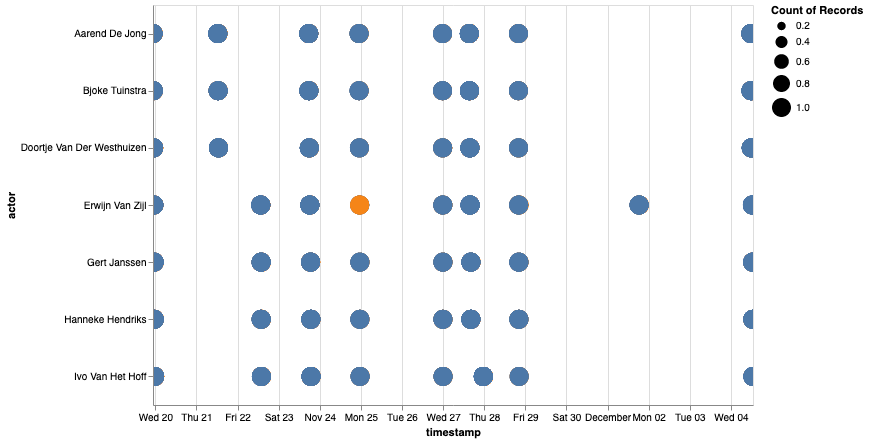

In [21]:
alt.Chart(df).mark_circle().encode(
    x='timestamp:T',
    y='actor:N',
    color=alt.Color('source:N', legend=None),
    size='count()',
    tooltip=['source:N', 'reaction:N', 'count()']
).properties(
    width=600,
    height=400
).interactive()

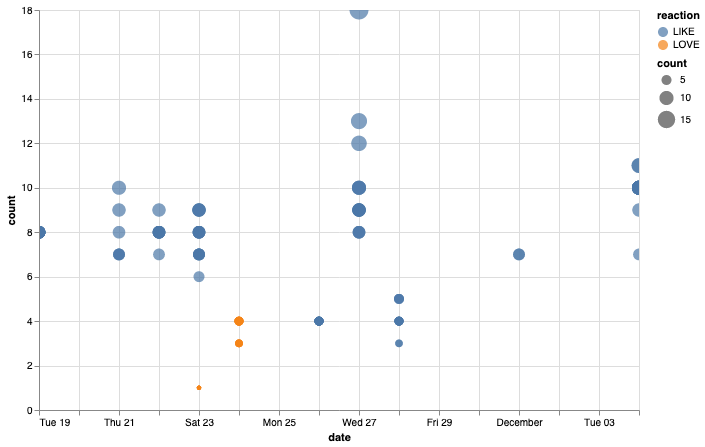

In [36]:
input_dropdown = alt.binding_select(options=list(set(df1.actor.unique())))
selection = alt.selection_single(
    fields=['actor'], bind=input_dropdown, name='Select an')
color = alt.condition(selection,
                      alt.Color('source:N', legend=None),
                      alt.value('lightgray'))

alt.Chart(df1).mark_circle().encode(
    x='date:T',
    y='count:Q',
    color=alt.Color('reaction:N'),
    size='count:Q',
    tooltip=['actor:N','source:N', 'reaction:N', 'count']
).add_selection(
    selection
).transform_filter(
    selection
).properties(
    width=600,
    height=400
).interactive()



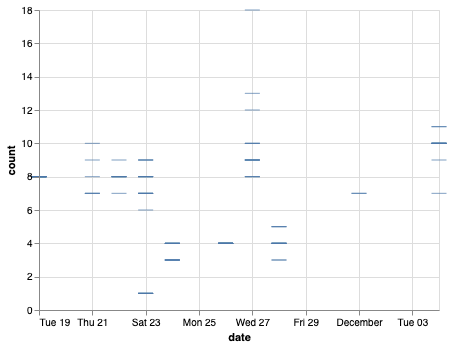

In [32]:
input_dropdown = alt.binding_select(options=list(set(df1.actor.unique())))
selection = alt.selection_single(
    fields=['actor'], bind=input_dropdown, name='Select an')
color = alt.condition(selection,
                      alt.Color('source:N', legend=None),
                      alt.value('lightgray'))

alt.Chart(df1).mark_tick().encode(
    x='date:T',
    y='count:Q',
)

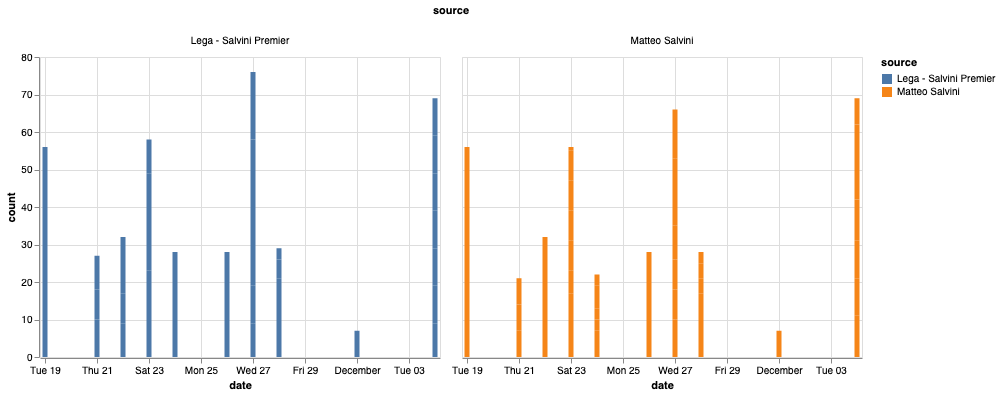

In [35]:
alt.Chart(df1).mark_bar().encode(
    x='date:T',
    y='count:Q',
    color='source:N',
    column='source:N'
)


In [24]:
import matplotlib.pyplot as plt

#count per hour single user 
#count reactions per source by user


plt.scatter(dates,values)
plt.plot(dates, values)
plt.show()

NameError: name 'dates' is not defined